# PCA para el análisis, visualización de datos, y entrenamiento de algoritmos de clasificación

## Tabla de Contenidos
1. Introducción
2. Importación de Datos
3. Preprocesar Datos
4. PCA <br/>
    4.1 Aplicación del PCA <br/>
    4.2 Análisis de resultados <br/>
    4.3 Visualización del PCA 2D <br/>
5. Detección de Outliers
6. Clasificación <br/>
    6.1 Clasificar <br/>
    6.2 Predicción y Análisis <br/>
    
    
## 1. Introducción
    
PCA es un algoritmo de reducción de dimensionalidad no supervisado. En este ejemplo lo emplearemos para satisfacer 3 objetivos:

**1. Hacer un análisis** <br/>
    Analizaremos la cantidad de componentes principales que son necesarios para resumir nuestros datos de una manera que no haya tanta pérdida de información. Este objetivo se establece únicamente como fase de experimentación.
    
**2. Facilitar la visualización de nuestros datos** <br/>
Ocuparemos 2 componentes principales para poder graficar nuestros datos multidimensionales en una gráfica de dispersión. Así podremos entender mejor nuestra data y podemos detectar posibles outliers.
    
**3. Como paso de preprocesamiento para la clasificación de elementos** <br/>
Por último ocuparemos PCA para resumir nuestros datos y eficientizar el entrenamiento de nuestro clasificador sin perder efectividad de clasificación.
        

## 2. Importación de Datos
El primer paso es importar los datos que ocuparemos para el análisis. El archivo de entrada debe ser un archivo de texto plano con el formato siguiente:
```
No. Elementos
No. Atributos
No. Clases
atrib_0, atrib_1, ..., atrib_n, clase
atrib_0, atrib_1, ..., atrib_n, clase
... ... ...
atrib_0, atrib_1, ..., atrib_n, clase
```

### Preprocesar archivo
Primero preprocesamos el archivo para obtener los metadatos de No. de elementos, atributos y clases que éste contiene en el encabezado y así construir nuestro dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

nombre_archivo = "data"

In [2]:
try:
    with open( nombre_archivo + ".txt", "r") as archivo:
        nElem = int(archivo.readline())
        nAtrib = int(archivo.readline())
        nClases = int(archivo.readline())
        
        atributos = []
        for i in range(0, nAtrib):
            atributos.append("atrib_" + str(i+1))
        
        atributos.append("clase")
        data = pd.read_csv(archivo, delimiter=',', header=None)
        data.columns = atributos
    
except FileNotFoundError:
    print( "ERROR: El archivo " + nombre_archivo + " no fue encontrado");
finally:
    archivo.close();

dataset = data;

Podemos obtener un pequeño vistazo de cómo se ve nuestro dataset hasta ahora.

In [3]:
x_fin = dataset.drop('clase', 1)
y_fin = dataset['clase']
nComponentes = "Sin Componentes"

In [4]:
dataset.head()

,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,atrib_11,atrib_12,atrib_13,atrib_14,atrib_15,atrib_16,atrib_17,atrib_18,atrib_19,clase
0,140,125,0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188,133,0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105,139,0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34,137,0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39,111,0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0


## 3. Preprocesar datos
Como PCA se soporta de la desviación estándar de los datos para calcular la nueva proyección de nuestros datos, una variable con una desviación estándar alta tendrá un peso mayor para el cálculo de la proyección que una variable con una desviación estándar baja. Si normalizamos los datos, todas las variables tendrán la misma desviación estándar, por lo tanto, el cálculo no estará cargado. 

Además, como no tenemos conocimiento del dominio del conjunto de datos de ejemplo, no sabemos si las unidades de medida de sus variables son distintas. Otra razón por la cual normalizar nuestros datos.

PCA se considera como un algoritmo no supervisado, esto quiere decir que se apoya únicamente del set de datos sin las clases asignadas. Por esto, el primer paso de preprocesamiento será dividir nuestro set en dos: el set con los atributos y el set de las clases de asignación. Paso continuo sería estandarizar los datos sin la columna de las clases.

In [5]:
x = dataset.drop('clase', 1)
y = dataset['clase']

x_estandarizada = StandardScaler().fit_transform(x)

try:
    atributos.remove('clase')
except:
    print('')
    
x_fin = pd.DataFrame(data = x_estandarizada, columns = atributos)
x_fin.head()

,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,atrib_11,atrib_12,atrib_13,atrib_14,atrib_15,atrib_16,atrib_17,atrib_18,atrib_19
0,-0.058049,-0.285629,0.0,-0.338097,-0.199868,-0.621918,-0.110554,-0.463761,-0.090389,-0.784836,-0.693751,-0.796105,-0.848481,1.511535,-0.712136,-0.070207,-0.849913,0.757935,-0.001032
1,0.598297,-0.153891,0.0,-0.338097,-0.199868,-0.598559,-0.103935,-0.509463,-0.093776,-0.769504,-0.659068,-0.793056,-0.837138,1.680258,-0.772656,-0.106443,-0.831181,0.724362,0.119387
2,-0.536634,-0.055087,0.0,-0.338097,-0.199868,-0.621918,-0.109110,-0.418060,-0.087325,-0.787194,-0.686044,-0.808304,-0.848481,1.607948,-0.772656,-0.052089,-0.856157,0.696035,0.094247
3,-1.507478,-0.088021,0.0,-0.338097,-0.199868,-0.528480,-0.107184,-0.341891,-0.088024,-0.795450,-0.678336,-0.829651,-0.856043,1.764620,-0.857382,-0.043030,-0.849913,0.891177,0.229748
4,-1.439109,-0.516170,0.0,-0.338097,-0.199868,-0.435042,-0.100444,-0.402826,-0.088669,-0.789553,-0.705312,-0.796105,-0.852262,1.451277,-0.687929,-0.061148,-0.846791,0.840188,-0.034012


## 4. PCA

### 4.1. Aplicar PCA
A continuación aplicaremos el PCA con tantos componentes principales como especifique el usuario.
Se calculan 2 por defecto para que a continuación podamos graficar nuestros datos.

In [6]:
nComponentes = int(input())
pca = PCA(n_components=nComponentes)

2


In [7]:
atributos = []
for i in range(nComponentes):
    atributos.append('PC'+ str(i+1))

In [8]:
x_pca = pca.fit_transform(x_estandarizada)
pca_dataframe = pd.DataFrame(data = x_pca, columns=atributos)

Una vez aplicado el PCA, podemos observar que las dimensiones se redujeron.

In [9]:
x_fin = pca_dataframe
x_fin.head()

,PC1,PC2
0,-2.299677,-0.343837
1,-2.371925,-0.403867
2,-2.389590,-0.266572
3,-2.514506,-0.096834
4,-2.236746,-0.124341


### 4.2. Análisis de resultados

A continuación calcularemos la razón de varianza para cada componente. Ésta relación es la varianza causada por cada componente princiapl. Esta nos sirve para observar que tan bien los componentes principales calculados representan a nuestros datos originales. 

Estos son las razones para los 19 componentes principales.
```
[4.13814900e-01, 1.65640288e-01, 1.06345188e-01, 6.27965215e-02,
5.78674248e-02, 4.70498598e-02, 4.20205907e-02, 3.83644353e-02,
2.77241028e-02, 1.90903343e-02, 1.22596944e-02, 4.70502749e-03,
2.29038862e-03, 3.12439197e-05, 1.49188547e-16, 1.03612940e-16,
9.12790822e-17, 7.73403277e-17, 9.78771803e-34]
```

Podemos observar que el CP1 es responsable de 41.3% de la varianza. Similarmente, el CP2 causa el 16.5% de la varianza en nuestro set de datos. Por lotanto, podemos decir que colectivamente, los dos primeros componentes principales capturan el 57.8% (41.3% + 16.5%) de la información de nuestro dataset, lo cual no es tan óptimo pero nos puede ser útil, por ejemplo, para graficar nuestros datos.

Como ejemplo, si quisieramos representar un 85% de nuestros datos, tendríamos que ocupar los 6 Componentes picipales primarios.

In [10]:
explained_variance = pca.explained_variance_ratio_

explained_variance_total = 0
i = 1
for element in explained_variance:
    print("PC" + str(i) + ": " + "{:.3f}".format(element))
    explained_variance_total += element
    i += 1

explained_variance_total *= 100
print("Total: " + "{:.2f}%".format(explained_variance_total))

PC1: 0.414
PC2: 0.166
Total: 57.95%


### 4.3. Visualizar PCA 2D
Nuestro dataset original contenía 19 dimensiones las cuales, a través del PCA, logramos reducir a 2. Esto lo hicimos para poder graficar nuesta data y poder recuperar patrones. 

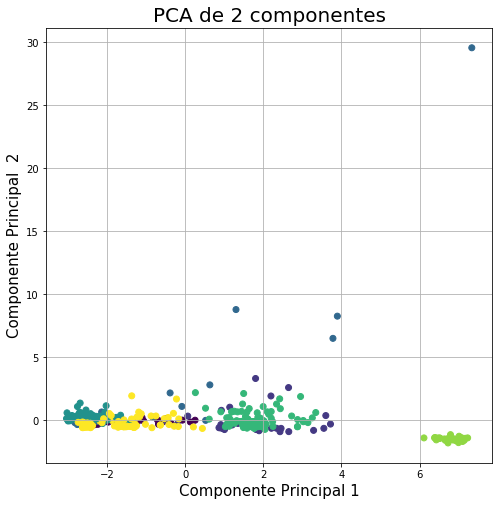

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal  2', fontsize = 15)
ax.set_title('PCA de 2 componentes', fontsize = 20)

plt.scatter(x_pca[:,0],x_pca[:,1], c=data['clase'])

ax.grid()

## 5. Detección de outliers

Al graficar observamos que hay elementos en nuestro dataset que se comportan de manera extraña y están muy alejados de los demás.

Se puede ver mucha varianza en el componente 2, con algunos elementos muy alejados de la media. Éstos son posibles elementos anómalos o outliers que, sin el dominio del dataset, no podríamos evaluar con certeza.

Primero, nos apoyaremos de la técnica de graficación por bigotes para detectar outliers en los dos componentes.

En el PC 1 no vemos elementos graficados fuera de los bigotes, lo que nos indica que no hay casos anómalos.

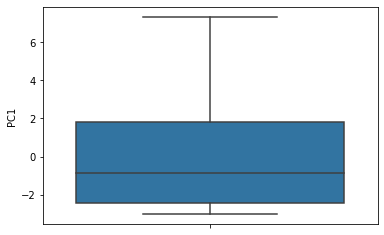

In [12]:
import seaborn as sns

pca_df_o = pd.concat([x_fin, data[['clase']]], axis = 1);
sns.boxplot(y = pca_df_o['PC1'])

A diferencia del PC1, en el PC2 podemos observar que existen elementos muy alejados de la media y de los bordes superior e inferior (Q1 y Q3).

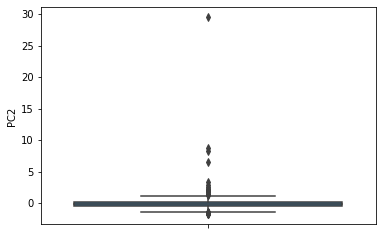

In [13]:
sns.boxplot(y = pca_df_o['PC2'])

Para efectos de la experimentación, supondremos que sí son outliers y queremos recortarlos.
Para esto nos apoyaremos del método del Rango Inter-Cuartil (IQR) que es el mismo que emplean las gráficas de bigotes para su graficación. Este método observa la dispersión estadística de nuestros datos. Con esto podremos detectar aquellos elementos que están muy alejados de la media y sobrepasan los límites superior e inferior, y eliminarlos.

In [14]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

Calculamos los límites inferior y superior.

In [15]:
lowerbound,upperbound = outlier_treatment(pca_df_o.PC2)
print(lowerbound, upperbound)

-1.4671932005127526 1.1785539827654923


Una vez identificados los límites podemos observar aquellos elementos que los exceden.

In [16]:
pca_df_o[(pca_df_o.PC2 < lowerbound) | (pca_df_o.PC2 > upperbound)]

,PC1,PC2,clase
30,7.088319,-1.560816,5
31,6.653630,-1.589645,5
32,6.754232,-1.498079,5
34,7.097352,-1.683036,5
35,7.072242,-1.571110,5
36,6.902150,-1.486911,5
43,6.851001,-1.565639,5
44,6.424831,-1.556289,5
45,7.027830,-1.539067,5
46,6.724713,-1.799339,5


Una vez identificados nuestros outliers, procederemos a eliminarlos.

In [17]:
final_df = pca_df_o

final_df.drop(
    final_df[
        (final_df.PC2 > upperbound) | (final_df.PC2 < lowerbound) 
    ].index , inplace=True
)

In [18]:
final_df[(final_df.PC2 < lowerbound) | (final_df.PC2 > upperbound)]

,PC1,PC2,clase


Como podemos observar, una vez eliminados los outliers, graficamos la gráfica de bigotes del PC2 y no tenemos outliers.

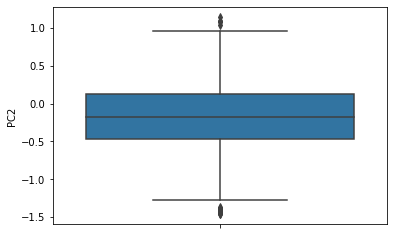

In [19]:
sns.boxplot(y = final_df['PC2'])

Una vez que limpiamos nuestros datos, procederemos a graficar de nuevo nuestros dos primeros componentes principales para observar de mejor manera como se dispersan nuestras clases.

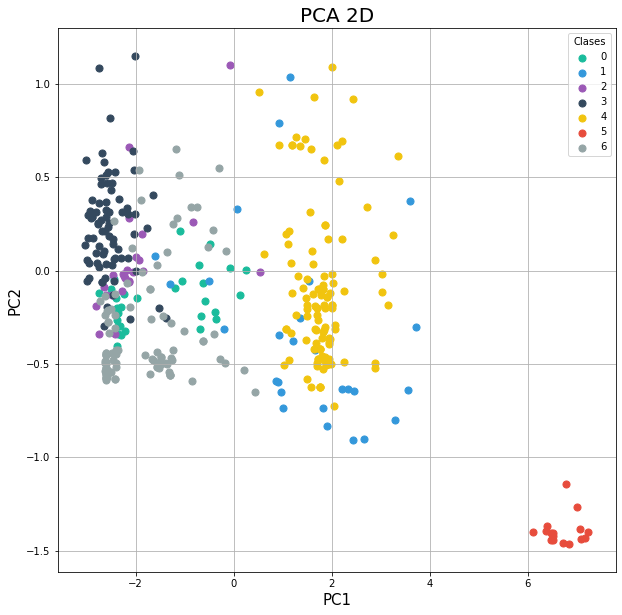

In [20]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA 2D', fontsize = 20)


targets = [0, 1, 2, 3, 4, 5, 6]
colors = ['#1abc9c', '#3498db', '#9b59b6', '#34495e', '#f1c40f', '#e74c3c', '#95a5a6']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['clase'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets, title="Clases")
ax.grid()

In [21]:
x_fin = final_df.drop('clase', 1)
y_fin = final_df['clase']

x_fin.head()

,PC1,PC2
0,-2.299677,-0.343837
1,-2.371925,-0.403867
2,-2.389590,-0.266572
3,-2.514506,-0.096834
4,-2.236746,-0.124341


## 6. Clasificación
Tener una gran cantidad de atributos en un dataset afecta el rendimiento y la precisión de los algoritmos de clasificación. Nuestro dataset original contenía 19 atributos, los cuales, a través de la técnica de reducción de dimensionalidad de PCA, logramos reducir a 2.

En este ejemplo entrenaremos un árbol de decisión con nuestros datos reducidos con PCA. En seguida, analizaremos la precisión de éste cuando es entrenado con distintas cantidades de Componentes Principales. El objetivo es ver el número óptimo de Componentes Principales que nos permitan reducir el tiempo de entrenamiento del clasificador al resumir nuestros datos adecuadamente, y conservar un elevado porcentaje de precisión.

In [22]:
dataframe = pd.concat([x_fin, y_fin], axis = 1);

X = dataframe.drop('clase', 1)
y = dataframe['clase']


El método de clasificación por árbol de decisión es un método de aprendizaje supervisado, por esto, debemos entrenarlo con el set de atributos y su clasificación inicial. Además, para probar la precisión de éste, necesitamos un set de prueba. Por ello procederemos a partir nuestro set de datos en 2 secciones: Un set para entrenar a nuestro clasificador, y uno para entrenarlo.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 6.1 Clasificar
Procederemos a entrenar nuestro clasificador con el set de datos de entrenamiento y sus respectivas clases.

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [25]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("arbol")

'arbol.pdf'

A continuación se muestra el árbol de decisión generado. El objetivo es generar un árbol no tan profundo para que la toma de decisiónes sea rápida. 

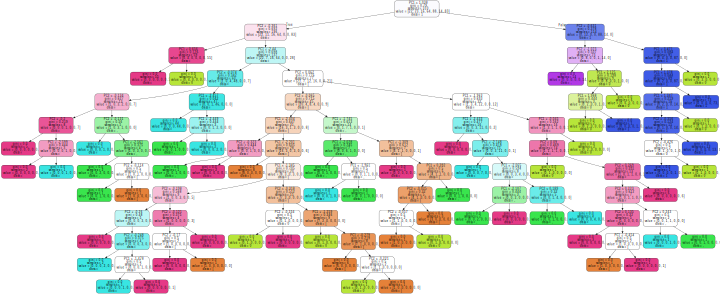

In [26]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=atributos,  
                      class_names= str([0, 1, 2, 3, 4, 5, 6]),  
                      filled=True, rounded=True,  
                      special_characters=True) 


pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')

gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

## 6.2 Predicción y Análisis
Por último predeciremos la clasificación de los datos de prueba que apartamos del set original antes de clasificar y compararemos, a través de una matriz de confusión, que tanto éstos se alejan de su verdadera clasificación.

In [27]:
y_pred = clf.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Número de Componentes Principales ocupados:")
print(nComponentes)
try:
    print("Explained_Variance: \n" + "{:.2f}%\n".format(explained_variance_total))
except:
    print()
print("Matriz de confusión: ")
print(cm)
print('\nPrecición de clasificación: \n' + "{:.2f}%\n".format(accuracy_score(y_test, y_pred)*100))

Número de Componentes Principales ocupados:
2
Explained_Variance: 
57.95%

Matriz de confusión: 
[[ 4  0  1  1  0  0  2]
 [ 0  1  0  0  3  0  0]
 [ 2  0  3  0  0  0  3]
 [ 0  0  0 11  0  0  2]
 [ 0  4  0  0 21  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  2  2  0  0  0 14]]

Precición de clasificación: 
71.79%



Podemos obeservar que al ocupar 2 componentes principales, estamos representando el 57.95% de nuestros datos originales y la precisión de nuestro clasificador es de 70.51%, lo cual no es óptimo.

Para observar la variación en la precisión del clasificador dependiendo de la cantidad de componentes principales que ocupemos realizamos múltiples experimentos, entrenando el clasificador el resultado del PCA tras alterar la cantidad de componentes principales que deseabamos.

A continuación se presenta la gráfica que relaciona la cantidad de componentes principales ocupados para el entrenmamiento del clasificador y su respectiva calificación de precisión de clasificación.

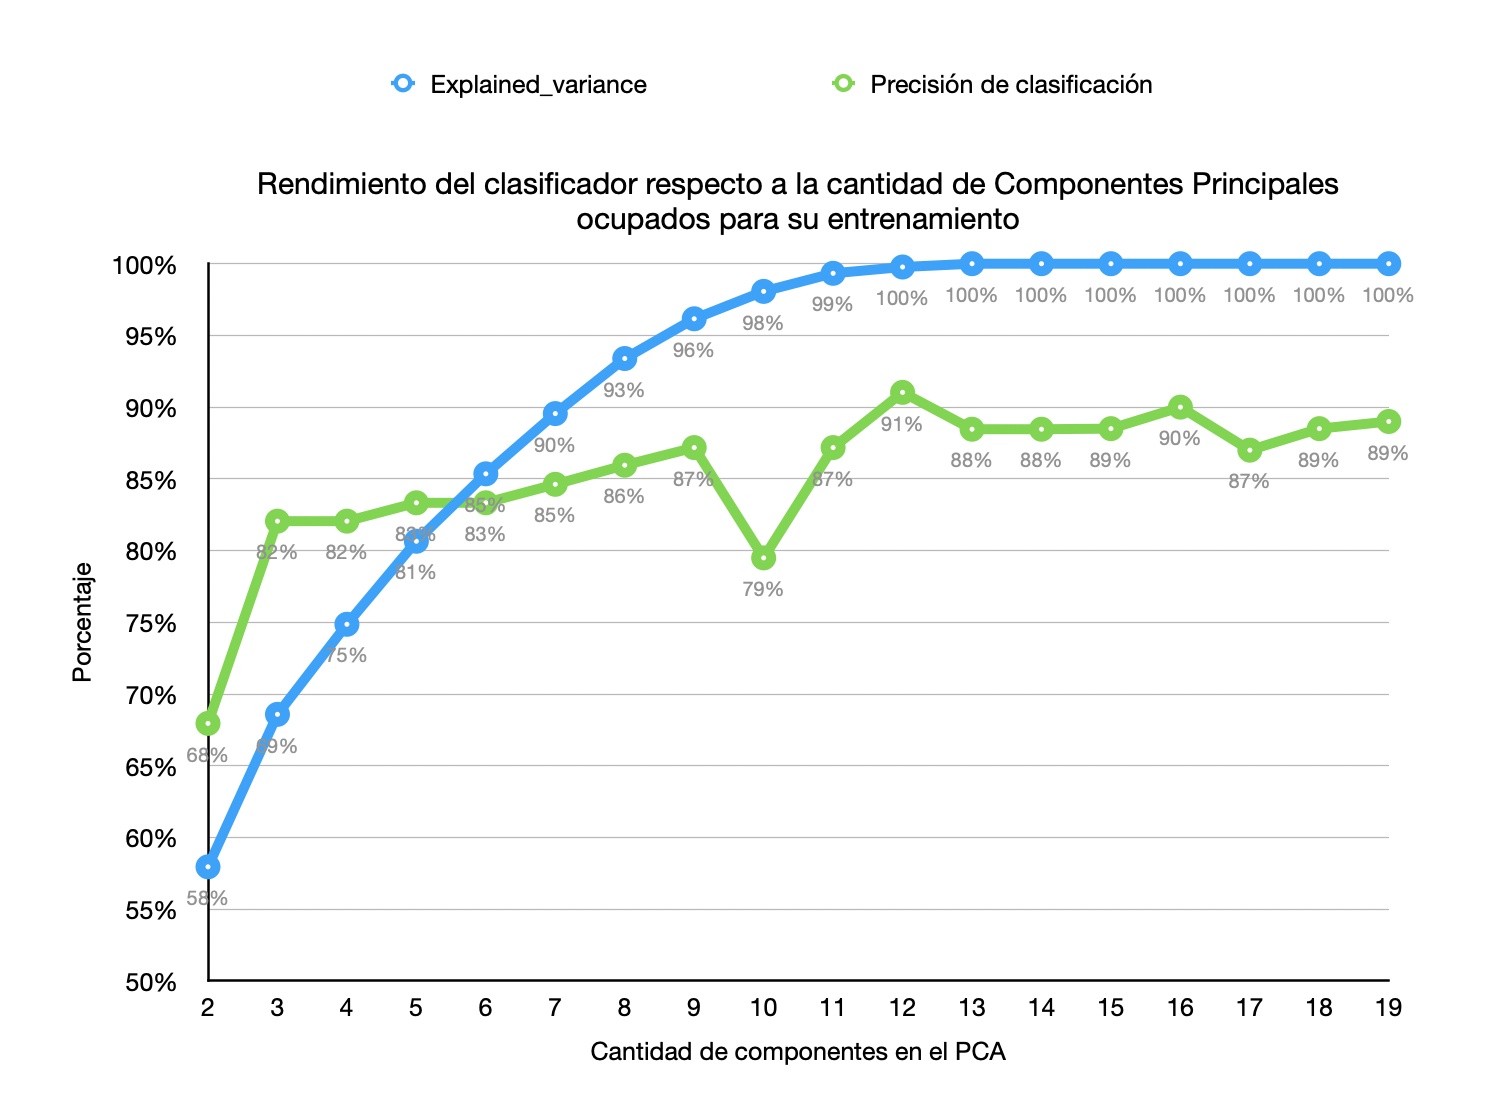

In [29]:
from IPython.display import Image
Image(filename='analisis.png') 

Como se observa en la gráfica, a partir de los 11-12 componentees principales, se tiene una casi perfecta representación de los datos principales. A su vez, es en estos valores que el clasificador tiene su máximo en cuanto a grado de precisión. Esto quiere decir que reducir nuestra data a 12 dimensiones, en este ejmplo, sería óptimo para el clasificador.